# Checking the diversity of additive molecules

Ver 1, 20210921

For checking the additives diversity, and prioritizing the experiments, we are using Tanimoto similarity to do it.

## Loading dataset

Choose which dataset you want for your first or second round of your hypothesis generation.

In [1]:
# Import all the packages needed for the notebook to run

# %matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
import rdkit
import os
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
from pandas import DataFrame, read_csv
from IPython.display import display_html
import seaborn as sns

In [21]:
# Import the perovskite crystal data
from collections import OrderedDict
cmaps = OrderedDict()

## IMPORTING DATA

# Change directory to where your .csv file is
os.chdir(os.getcwd())

# Load the .csv file 

# The molecular features & processing conditions are loaded as X
data = pd.read_csv('dataset/20211013_smiles_experimental_candidates_sorted.csv') 
# data = pd.read_csv('20210902_subset_additives_list_1.csv') 

# Check if the data is loaded and separated correctly
pd.set_option('max_rows', 8)
data

,isosmiles,data_collected,index
0,n1ccccc1-c2ccccn2,2,0
1,Cc1ccnc(c1)-c2cc(C)ccn2,3,1
2,Cc1ccc(nc1)-c2ccc(C)cn2,2,2
3,Cc1cccc(n1)-c2cccc(C)n2,2,3
...,...,...,...
25,COC(=O)c1ccnc(c1)-c2cc(cc(n2)-c3cc(ccn3)C(=O)O...,4,25
26,COC1=CC(=NC(=C1)C2=CC=CC=N2)C=NO,1,26
27,OC(=O)c1cccnc1-c2ncccc2C(O)=O,5,27
28,C1=CC=C2C(=C1)C(=CC(=N2)C3=CC=CC=N3)C(=O)O,1,28


In [22]:
# Read the dataframe of degradation data
data_SMILES = pd.DataFrame(data['isosmiles'])

# clean the NaN on crystal score
data_SMILES = data_SMILES.dropna(subset=['isosmiles'])

data_SMILES

,isosmiles
0,n1ccccc1-c2ccccn2
1,Cc1ccnc(c1)-c2cc(C)ccn2
2,Cc1ccc(nc1)-c2ccc(C)cn2
3,Cc1cccc(n1)-c2cccc(C)n2
...,...
25,COC(=O)c1ccnc(c1)-c2cc(cc(n2)-c3cc(ccn3)C(=O)O...
26,COC1=CC(=NC(=C1)C2=CC=CC=N2)C=NO
27,OC(=O)c1cccnc1-c2ncccc2C(O)=O
28,C1=CC=C2C(=C1)C(=CC(=N2)C3=CC=CC=N3)C(=O)O


## Convert SMILES to ROMol

In [23]:
# Load rdkit package
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem

,isosmiles,ROMol
0,n1ccccc1-c2ccccn2,
1,Cc1ccnc(c1)-c2cc(C)ccn2,
2,Cc1ccc(nc1)-c2ccc(C)cn2,
3,Cc1cccc(n1)-c2cccc(C)n2,
...,...,...
25,COC(=O)c1ccnc(c1)-c2cc(cc(n2)-c3cc(ccn3)C(=O)O...,
26,COC1=CC(=NC(=C1)C2=CC=CC=N2)C=NO,
27,OC(=O)c1cccnc1-c2ncccc2C(O)=O,
28,C1=CC=C2C(=C1)C(=CC(=N2)C3=CC=CC=N3)C(=O)O,

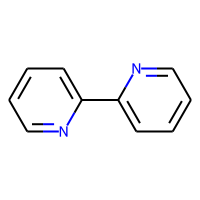
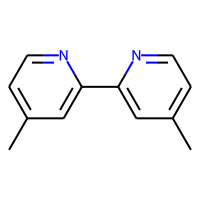
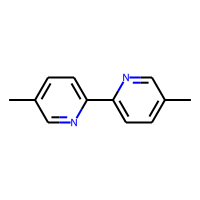
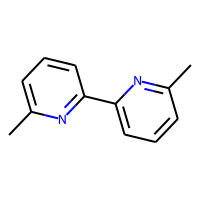
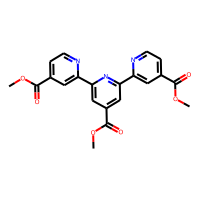
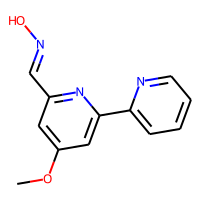
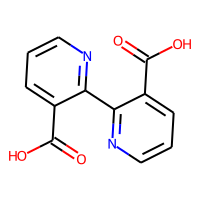
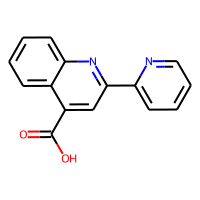

In [24]:
esol_data = pd.DataFrame(data_SMILES['isosmiles'])
PandasTools.AddMoleculeColumnToFrame(esol_data, smilesCol='isosmiles')
# esol_data.head(5)
esol_data

## Generate Mordred features

In [25]:
# Import more packages
from multiprocessing import freeze_support
from mordred import Calculator, descriptors

In [26]:
# Find the unique SMILES, and put them in a list, to ensure non-repeating SMILES
smiles_unique =((esol_data['isosmiles'].unique()).tolist())
smiles_list = []
for i in range(len(smiles_unique)):
    smiles_list.append(Chem.MolFromSmiles(smiles_unique[i]))

In [27]:
# Create Calculator
calc = Calculator(descriptors)
calc.pandas(smiles_list)

100%|██████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:03<00:00,  8.06it/s]


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,9.151948,7.830014,0,0,16.383377,2.278414,4.556827,16.383377,1.365281,3.412246,...,9.076466,42.338794,156.068748,7.803437,198,14,58.0,65.0,2.722222,2.777778
1,10.784941,9.210281,0,0,17.820064,2.325836,4.651672,17.820064,1.272862,3.564437,...,9.364862,45.452411,184.100048,7.080771,301,18,70.0,79.0,4.444444,3.111111
2,10.784941,8.989080,0,0,18.121287,2.316265,4.632531,18.121287,1.294378,3.564424,...,9.347577,45.428250,184.100048,7.080771,315,18,70.0,79.0,4.444444,3.111111
3,10.784941,9.210281,0,0,17.820064,2.325836,4.651672,17.820064,1.272862,3.564437,...,9.364862,45.452411,184.100048,7.080771,301,18,70.0,79.0,4.444444,3.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,22.753386,18.267767,0,0,39.333914,2.431023,4.862047,39.333914,1.311130,4.313012,...,10.245125,65.504890,407.111735,8.661952,2463,49,152.0,178.0,10.611111,6.888889
26,12.687482,10.877070,0,0,22.187485,2.355577,4.711153,22.187485,1.305146,3.741910,...,9.507255,49.195091,229.085127,8.181612,524,23,82.0,93.0,5.194444,4.027778
27,13.670387,12.173480,2,0,22.781855,2.415880,4.831760,22.781855,1.265659,3.804566,...,9.764743,50.964952,244.048407,9.386477,563,28,90.0,105.0,6.666667,4.055556
28,14.906262,12.044346,1,0,25.272632,2.445155,4.890310,25.272632,1.330139,3.885646,...,9.907131,52.559884,250.074228,8.623249,664,30,100.0,118.0,5.416667,4.194444


In [28]:
mordred_data = calc.pandas(esol_data['ROMol'])
mordred_data = mordred_data.dropna(axis='columns')

# What if we want to see a specific feature?
# atsc5z_only = mordred_data['ATSC5Z']
# aatsc5z_only = mordred_data['AATSC5Z']
# aatsc5z_only = pd.DataFrame(aatsc5z_only)
# atsc5z_aatsc5z = pd.DataFrame(atsc5z_only)
# atsc5z_aatsc5z['AATSC5Z']=aatsc5z_only['AATSC5Z']
# # atsc5z_only.to_csv('20210923_mordred_all_additives.csv',index = False, header=True)
# # atsc5z_only['SMILES']=data_SMILES['SMILES']
# # aatsc5z_only
# atsc5z_aatsc5z

100%|██████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:03<00:00,  9.58it/s]


## Tanimoto similarity map

In [29]:
# smiles_unique = esol_data['SMILES'].unique()
# What if we want to compare 2 molecules?
mol_1 = Chem.MolFromSmiles(smiles_unique[3])
mol_2 = Chem.MolFromSmiles(smiles_unique[23])

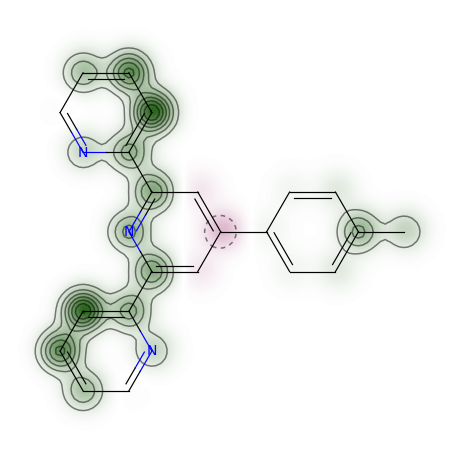

In [30]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps

fp = SimilarityMaps.GetAPFingerprint(mol_2, fpType='normal')
fp = SimilarityMaps.GetTTFingerprint(mol_2, fpType='normal')
fp = SimilarityMaps.GetMorganFingerprint(mol_2, fpType='bv')

fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(mol_1, mol_2, SimilarityMaps.GetMorganFingerprint)
plt.show()

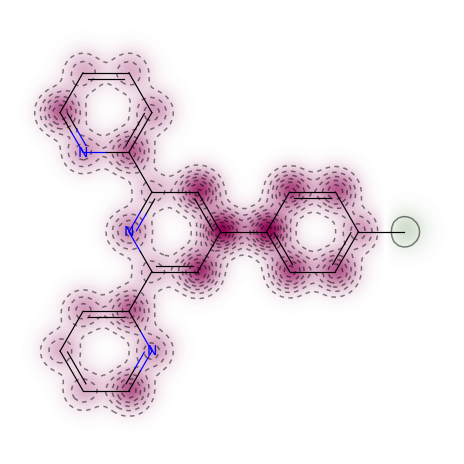

In [31]:
from rdkit import DataStructs
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(mol_1, mol_2, lambda m,idx: SimilarityMaps.GetMorganFingerprint(m, atomId=idx, radius=2, fpType='count'), metric=DataStructs.TanimotoSimilarity)
plt.show()

This is from https://stackoverflow.com/questions/51681659/how-to-use-rdkit-to-calculte-molecular-fingerprint-and-similarity-of-a-list-of-s

In [35]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols

c_smiles = []
for ds in smiles_unique:
    try:
        cs = Chem.CanonSmiles(ds)
        c_smiles.append(cs)
    except:
        print('Invalid SMILES:', ds)

# Make a list of mols
ms = [Chem.MolFromSmiles(x) for x in smiles_unique]

# Make a list of fingerprints (fp)
fps = []

for i in range(len(ms)):
    fps.append(FingerprintMols.FingerprintMol(ms[i], minPath=1, maxPath=7, fpSize=2048,
                               bitsPerHash=2, useHs=True, tgtDensity=0.0,
                               minSize=128))

In [37]:
# The list for the dataframe
qu, ta, sim = [], [], []

# Compare all fp pairwise without duplicates
for n in range(len(fps)-1): # -1 so the last fp will not be used
    s = DataStructs.BulkTanimotoSimilarity(fps[n], fps[n+1:]) # +1 compare with the next to the last fp
#     print(c_smiles[n], c_smiles[n+1:]) # Which mol is compared with what group
    # Collect the SMILES and values
    for m in range(len(s)):
        qu.append(c_smiles[n])
        ta.append(c_smiles[n+1:][m])
        sim.append(s[m])
print()

# Build the dataframe and sort it
d = {'query':qu, 'target':ta, 'Similarity':sim}
df_final = pd.DataFrame(data=d)
# df_final = df_final.sort_values('Similarity', ascending=False)
# print(df_final)

df_final
df_final.to_csv('dataset/test_similarity_rank.csv', index=False, sep=',')

Now, let's compare all of them with each other/

Based on https://iwatobipen.wordpress.com/2019/06/21/gettanimtosim-distmat-as-a-lower-triangular-matrix-and-convert-2d-array-rdkit-chemoinformatics/comment-page-1/

In [38]:
from rdkit.DataManip.Metric import GetTanimotoDistMat
from rdkit.DataManip.Metric import GetTanimotoSimMat

distmat = GetTanimotoDistMat(fps)
simmat = GetTanimotoSimMat(fps)

In [39]:
# print(distmat, len(distmat))
print(simmat, len(simmat))

[0.69256757 0.70205479 0.65633803 0.66343042 0.57552083 0.61126005
 0.67213115 0.54102564 0.54663212 0.535      0.66993464 0.54358974
 0.54521964 0.53366584 0.99673203 0.59593023 0.51658768 0.5215311
 0.48409091 0.475      0.4739229  0.58908046 0.85057471 0.57635468
 0.50688073 0.48747153 0.48974943 0.46610169 0.53805774 0.46536797
 0.4726477  0.46186441 0.45031712 0.44936709 0.43564356 0.42941176
 0.55256065 0.45633188 0.4766147  0.44989339 0.45064378 0.4496788
 0.43863179 0.42376238 0.41353383 0.55256065 0.45633188 0.4766147
 0.44989339 0.45064378 0.4496788  0.43863179 0.42376238 0.41353383
 1.         0.54521277 0.46086957 0.47787611 0.45744681 0.45512821
 0.45415778 0.43712575 0.43366337 0.64208243 0.42015209 0.42015209
 0.52835052 0.45842217 0.47505423 0.46121593 0.78608247 0.7840617
 0.4296875  0.43190661 0.61894737 0.40295749 0.40295749 0.62553191
 0.55256065 0.48222222 0.4766147  0.46868251 0.46637744 0.46536797
 0.5577342  0.45252525 0.41353383 0.43520309 0.43520309 0.40943396

In [40]:
import pprint

def get_triangled_list(l, rows, typ='lower'):
    if type(l) is not list:
        print ('First parameter should be a list')
        return None

    if type(rows) is not int:
        print ('Second parameter should be a list')
        return None

    if not(typ == 'lower' or typ == 'upper'):
        print ('ERROR:', typ, 'is not allowed type')
        return None

    new_l = []
    length = len(l)
    num_items = ((rows-1) * rows)/ 2

    if length != num_items:
        print ('ERROR: ', 'There should be exactly', num_items, 'items for ', rows, 'rows, found', length, 'items.')
        return None

    if typ == 'upper':
        for i in range(rows):
            temp_l = [0]*(i+1) + [l.pop(0) for j in range(7-(i+1))] 
            new_l.append(temp_l)
    elif typ=='lower':
        for i in range(rows):
            temp_l = [l.pop(0) for j in range(i)] + [0]*(rows-i)
            new_l.append(temp_l)

    return new_l

new_lower = get_triangled_list(simmat.tolist(), 29)
# new_lower = get_triangled_list(simmat.tolist(), 7)
print(np.array(new_lower))

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.69256757 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.70205479 0.65633803 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.66343042 0.57552083 0.61126005 0.         0.         0.
  0.         0.         0.         0.         

In [48]:
# distarr = tri2mat(distmat)
# simmat = tri2mat(simmat)

# Masking upper triangle
mask_ut = np.triu(np.ones_like(new_lower,dtype=bool)) 

# Colormap
cmap = sns.cubehelix_palette(start=.4, rot=-.75, reverse=True, as_cmap=True)

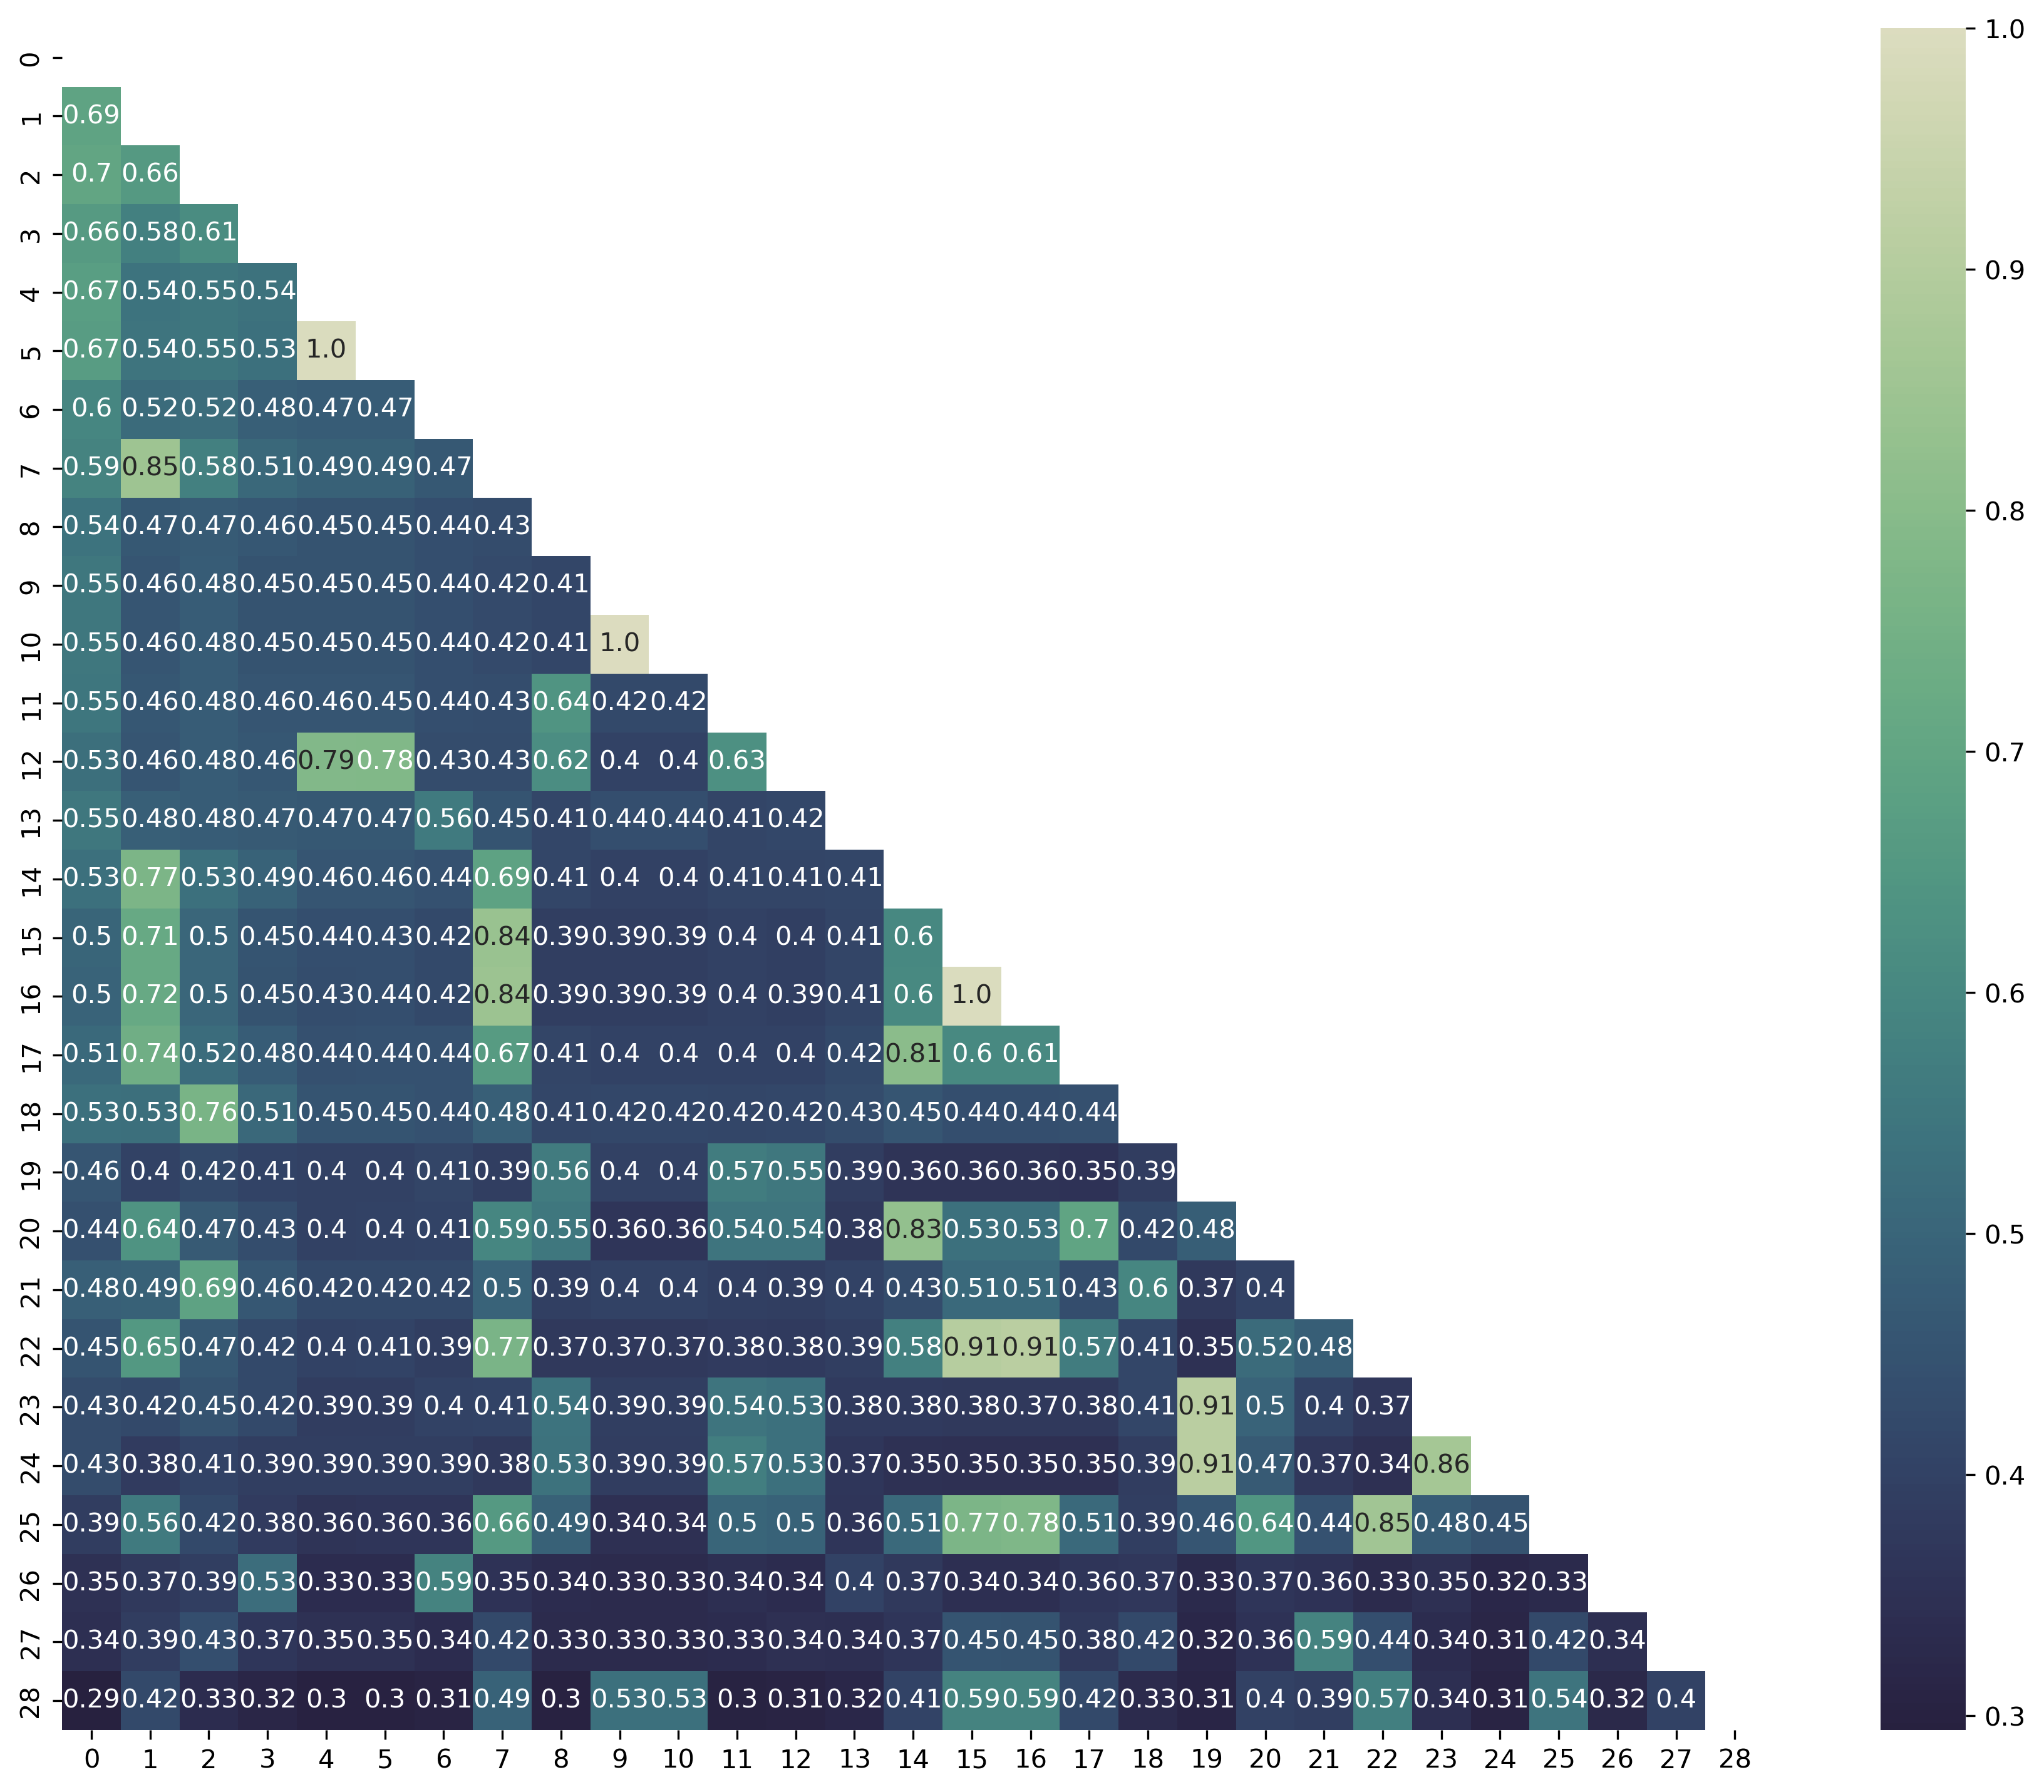

In [49]:
# Plotting the similarity matrix across different combinations of molecules
# sns.heatmap(simmat)
fig = plt.figure(figsize=(16,12),dpi=300)
# fig = plt.figure(figsize=(4,3),dpi=300)
# ax = sns.heatmap(simmat, mask=mask_ut, cmap=cmap, square=True,annot=True,fmt=".2")
ax = sns.heatmap(new_lower, mask = mask_ut,cmap=cmap, square=True,annot=True,fmt=".2")
plt.rcParams['font.size'] = '10'

plt.show()

Trying to plot the full matrix and get the mean.

In [50]:
new_upper = np.transpose(new_lower)
full_matrix = new_upper+new_lower
# print(full_matrix)

In [51]:
# Manipulating matrix so that the diagonal is taken out

# full_matrix_removed = np.zeros(np.shape(full_matrix))
# print(np.shape(full_matrix))

for i in range(np.shape(full_matrix)[0]):
    full_matrix[i,i] = full_matrix[0,i]
    full_matrix[0,i] = 0

# print(full_matrix)

full_matrix_removed = full_matrix[1:,:]
print(np.shape(full_matrix_removed))
print(full_matrix_removed)

(28, 29)
[[0.69256757 0.69256757 0.65633803 0.57552083 0.54102564 0.54358974
  0.51658768 0.85057471 0.46536797 0.45633188 0.45633188 0.46086957
  0.45842217 0.48222222 0.77083333 0.71359223 0.7184466  0.74
  0.52808989 0.40037594 0.63655914 0.48966942 0.65342163 0.42173112
  0.38282648 0.55849057 0.37227414 0.3875969  0.42060086]
 [0.70205479 0.65633803 0.70205479 0.61126005 0.54663212 0.54521964
  0.5215311  0.57635468 0.4726477  0.4766147  0.4766147  0.47787611
  0.47505423 0.4766147  0.53287982 0.50321199 0.5010661  0.51754386
  0.76041667 0.41954023 0.46990291 0.68705882 0.46653543 0.4490566
  0.40585009 0.41968912 0.38985737 0.43478261 0.33468286]
 [0.66343042 0.57552083 0.61126005 0.66343042 0.535      0.53366584
  0.48409091 0.50688073 0.46186441 0.44989339 0.44989339 0.45744681
  0.46121593 0.46868251 0.49353448 0.45252525 0.45070423 0.47708333
  0.50652174 0.40630798 0.43333333 0.46215139 0.42164179 0.41952984
  0.38869258 0.37993421 0.52559727 0.36746988 0.31503268]
 [0.6721

In [52]:
matrix_df = pd.DataFrame(full_matrix_removed)
# matrix_df
sorted_index = matrix_df.mean().sort_values().index
matrix_df_sorted = matrix_df[sorted_index]

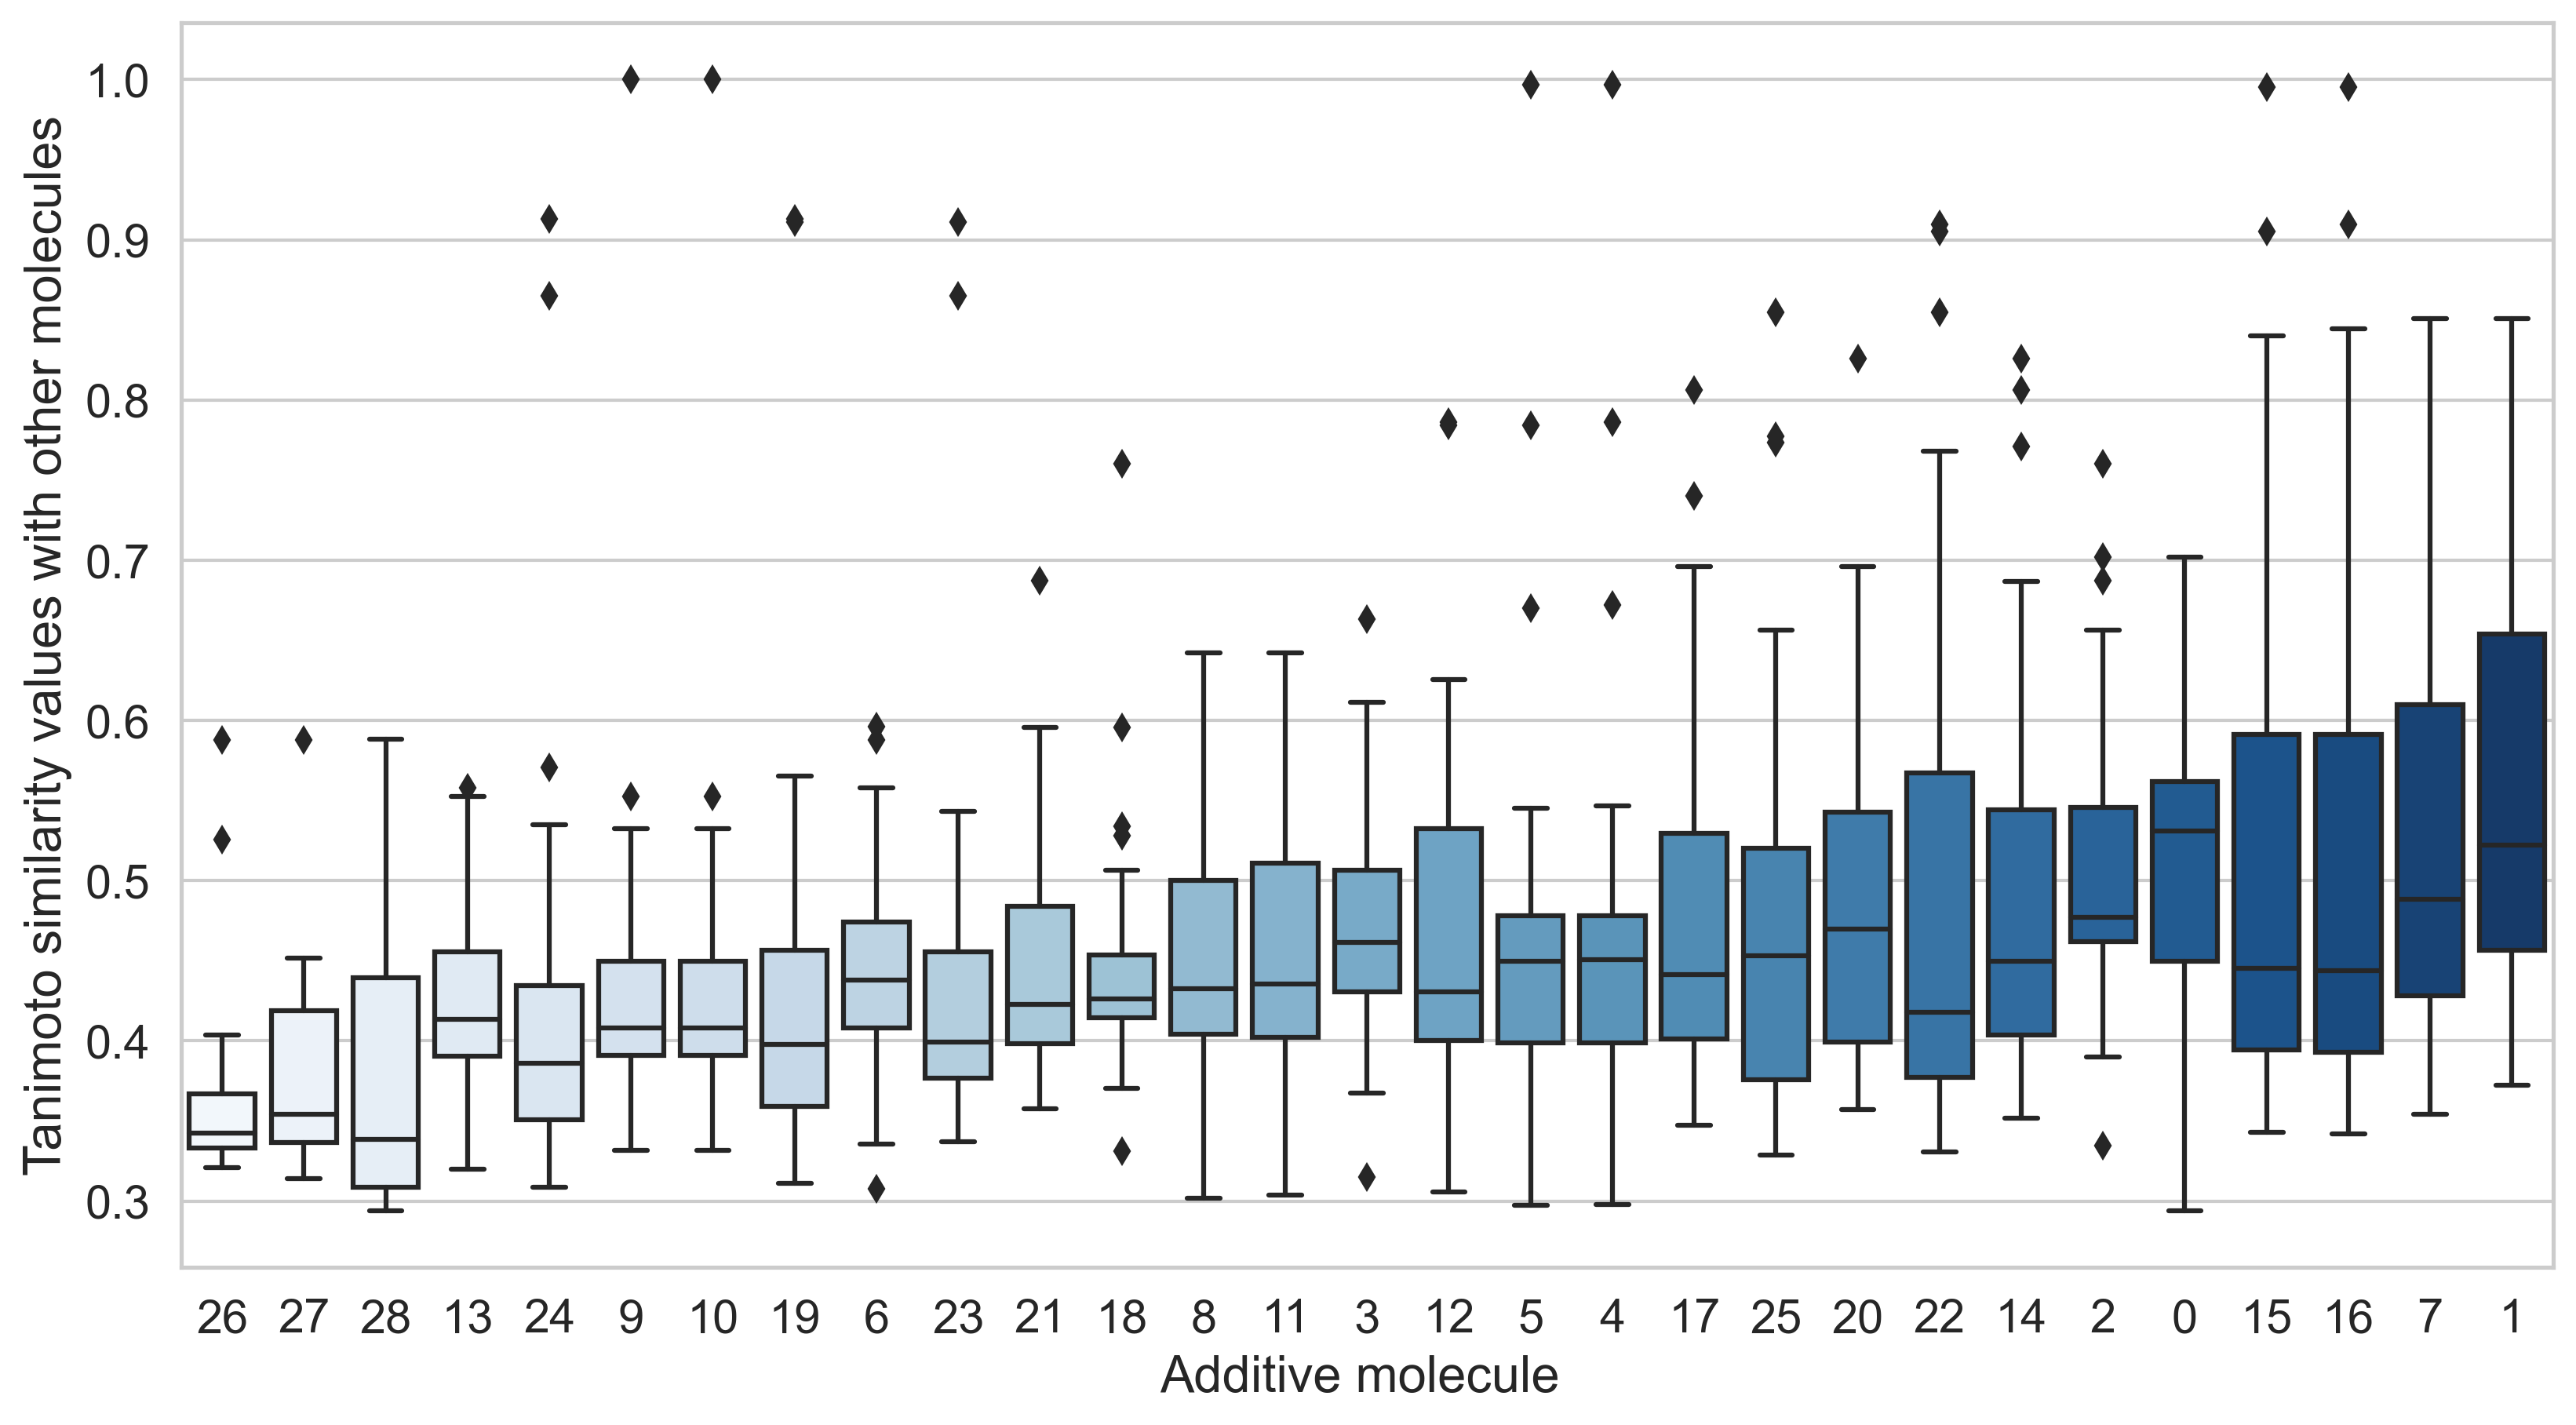

In [54]:
# Now let's plot the mean
# cmap = sns.cubehelix_palette(start=.4, rot=-.75, reverse=True, as_cmap=True)
sns.set(rc={'figure.figsize': (13,7)})
plt.rcParams['figure.dpi'] = 300

sns.set(font_scale=1.3)
sns.set_style('whitegrid')

ax = sns.boxplot(data=matrix_df_sorted, palette='Blues')

# plt.rcParams['font.size'] = '14'
ax.set_xlabel('Additive molecule ')
ax.set_ylabel('Tanimoto similarity values with other molecules')
plt.show()